In [323]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error 
from datetime import datetime

warnings.simplefilter('ignore')

**Single Exponential Smoothing**

In [324]:
# Importing the dataset
data = pd.read_csv('D1.csv')

In [325]:
#Defining Single Exponential Smoothing function ses
def ses(arr,alpha):
    arr1 = [arr[0]]
    for i in range(1, len(arr)):
        arr1.append(alpha * arr[i-1] + (1 - alpha) * arr1[i-1])
    return arr1

In [326]:
#Defining Mean of Squared Error Function mse
def mse(arr1,arr2):
  arr3=[0]
  for i, j in zip(arr1, arr2):
    arr3.append(i-j)
  Sum=0
  for i in arr3:
    sqr=i**2
    Sum+=sqr
  mse=Sum/(len(arr2)-1)
  return mse

In [327]:
#Function to make list of demand with interval 'n'
def dem_n(arr,n):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%n==0:  
      arr1.append(arr[i])
  return arr1

In [328]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,1)

In [329]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d1_ses_1=ses(demand,alpha1)
forecast_d1_ses_2=ses(demand,alpha2)
forecast_d1_ses_3=ses(demand,alpha3)

In [330]:
#Calculating Mean of Square Errors
mse_d1_ses_1=mean_squared_error(demand,forecast_d1_ses_1)
mse_d1_ses_2=mean_squared_error(demand,forecast_d1_ses_2)
mse_d1_ses_3=mean_squared_error(demand,forecast_d1_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d1_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d1_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d1_ses_3)

Mean of Square Errors for alpha = 0.2 is:  579307569.3120805
Mean of Square Errors for alpha = 0.5 is:  294663702.3145188
Mean of Square Errors for alpha = 0.8 is:  180650995.23190618


alpha:  0.8


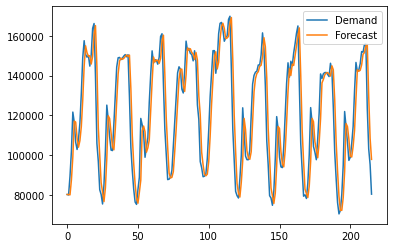

In [331]:
#Comparing mse and plotting for least mse
d1_ses_1={'Demand':demand,'Forecast':forecast_d1_ses_1}
d1_ses_2={'Demand':demand,'Forecast':forecast_d1_ses_2}
d1_ses_3={'Demand':demand,'Forecast':forecast_d1_ses_3}

df1=pd.DataFrame(d1_ses_1)
df2=pd.DataFrame(d1_ses_2)
df3=pd.DataFrame(d1_ses_3)

if mse_d1_ses_1<=mse_d1_ses_2 and mse_d1_ses_1<=mse_d1_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d1_ses_2<=mse_d1_ses_1 and mse_d1_ses_2<=mse_d1_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

**Double Exponential Smoothing**

In [332]:
#Defining Double Exponential Smoothing function des
def des(arr,alpha,beta):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  arr1.append(a[0]+b[0])
  for i in range(1,len(arr)-1):
      a.append(alpha * arr[i] + (1 - alpha) * (a[i-1]+b[i-1]))
      b.append(beta * (a[i]-a[i-1]) + (1 - beta) * (b[i-1]))        
      arr1.append(a[i]+b[i])
  return arr1

In [333]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,1)

In [334]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d1_des_1=des(demand,alpha1,beta1)
forecast_d1_des_2=des(demand,alpha2,beta2)
forecast_d1_des_3=des(demand,alpha3,beta3)

In [335]:
#Calculating Mean of Square Errors
mse_d1_des_1=mean_squared_error(demand,forecast_d1_des_1)
mse_d1_des_2=mean_squared_error(demand,forecast_d1_des_2)
mse_d1_des_3=mean_squared_error(demand,forecast_d1_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d1_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d1_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d1_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  1101400664.8511913
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  326927800.9790601
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  151817769.98831183


alpha:  0.8
beta:  0.9


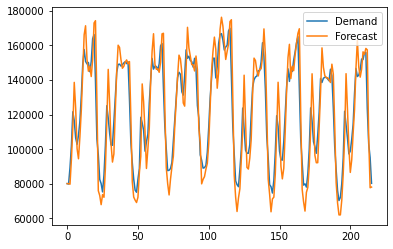

In [336]:
#Comparing mse and plotting for least mse
d1_des_1={'Demand':demand,'Forecast':forecast_d1_des_1}
d1_des_2={'Demand':demand,'Forecast':forecast_d1_des_2}
d1_des_3={'Demand':demand,'Forecast':forecast_d1_des_3}

df1=pd.DataFrame(d1_des_1)
df2=pd.DataFrame(d1_des_2)
df3=pd.DataFrame(d1_des_3)

if mse_d1_des_1<=mse_d1_des_2 and mse_d1_des_1<=mse_d1_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d1_des_2<=mse_d1_des_1 and mse_d1_des_2<=mse_d1_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

**Triple Exponential Smoothing**

In [337]:
#Defining initial trend
def initial_trend(arr, slen):
    Sum = 0
    for i in range(slen):
        Sum += float(arr[i+slen] - arr[i]) / slen
    return Sum / slen

In [338]:
#Defining initial seasonal
def initial_seasonal(arr, slen):
    arr1 = {}
    s_avg = []
    m = int(len(arr)/slen)
    for j in range(m):
        s_avg.append(sum(arr[slen*j:slen*j+slen])/float(slen))
    for i in range(slen):
        Sum = 0
        for j in range(m):
            Sum += arr[slen*j+i]-s_avg[j]
        arr1[i] = Sum/m
    return arr1

In [339]:
#Defining Triple Exponential Smoothing function tes with interval 'n'
def tes(arr, slen, alpha, beta, gamma, n):
    arr1 = []
    seasonals = initial_seasonal(arr, slen)
    for i in range(len(arr)+n):
        if i == 0:
            smooth = arr[0]
            trend = initial_trend(arr, slen)
            arr1.append(arr[0])
            continue
        if i >= len(arr):
            m = i - len(arr) + 1
            arr1.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = arr[i]
            lsmooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-lsmooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            arr1.append(smooth+trend+seasonals[i%slen])
    return arr1

In [340]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,1)

In [341]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

gamma1=0.4
gamma2=0.7
gamma3=0.95

#Considering season of 24 hours here

forecast_d1_tes_1=tes(demand,24,alpha1,beta1,gamma1,0)
forecast_d1_tes_2=tes(demand,24,alpha2,beta2,gamma2,0)
forecast_d1_tes_3=tes(demand,24,alpha3,beta3,gamma3,0)

In [342]:
#Calculating mean of sqaured errors
mse_d1_tes_1=mean_squared_error(demand,forecast_d1_tes_1)
mse_d1_tes_2=mean_squared_error(demand,forecast_d1_tes_2)
mse_d1_tes_3=mean_squared_error(demand,forecast_d1_tes_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is: ",mse_d1_tes_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is: ",mse_d1_tes_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is: ",mse_d1_tes_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is:  39484131.11945676
Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is:  23937405.76224272
Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is:  29542236.11162395


alpha:  0.5
beta:  0.6
gamma:  0.7


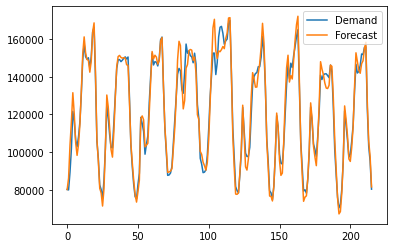

In [343]:
#Comparing mse and plotting for least mse
d1_tes_1={'Demand':demand,'Forecast':forecast_d1_tes_1}
d1_tes_2={'Demand':demand,'Forecast':forecast_d1_tes_2}
d1_tes_3={'Demand':demand,'Forecast':forecast_d1_tes_3}

df1=pd.DataFrame(d1_tes_1)
df2=pd.DataFrame(d1_tes_2)
df3=pd.DataFrame(d1_tes_3)

if mse_d1_tes_1<=mse_d1_tes_2 and mse_d1_tes_1<=mse_d1_tes_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  print('gamma: ',gamma1)
  df1.plot(style=['-','-'])
elif mse_d1_tes_2<=mse_d1_tes_1 and mse_d1_tes_2<=mse_d1_tes_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  print('gamma: ',gamma2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  print('gamma: ',gamma3)
  df3.plot(style=['-','-'])



---

---

---







**Applying KPSS and ADF test**

1. ADF test

In [344]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    #Perform Dickey-Fuller test:
    timeseries = data[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Ads')

Results of Dickey-Fuller Test for  Ads 

Test Statistic                -7.089634e+00
p-value                        4.444804e-10
#Lags Used                     9.000000e+00
Number of Observations Used    2.060000e+02
Critical Value (1%)           -3.462499e+00
Critical Value (5%)           -2.875675e+00
Critical Value (10%)          -2.574304e+00
dtype: float64


2. KPSS test

In [345]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(atr):
    timeseries = data[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Ads')

Results of KPSS Test for  Ads
Test Statistic            0.085159
p-value                   0.100000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


For ADF test, we can see that the p-value  is 4.444804e-10, which is less than 0.05. Thus, from ADF test, we can say that the dataset is stationary.

For KPSS test, Test Statistic is less than Critical Value, thus we fail to reject the null hypothesis. Thus, from KPSS test, we can say that the dataset is stationary.

Since, both tests conclude that the series is stationary, therefore, the dataset is concluded as Stationary.



---

---

---







**Prediction for Intervals**

For Single Exponential Smoothening



1. For interval of 1 hour

In [346]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,1)

In [347]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d1_ses_1=ses(demand,alpha1)
forecast_d1_ses_2=ses(demand,alpha2)
forecast_d1_ses_3=ses(demand,alpha3)

In [348]:
#Calculating Mean of Square Errors
mse_d1_ses_1=mean_squared_error(demand,forecast_d1_ses_1)
mse_d1_ses_2=mean_squared_error(demand,forecast_d1_ses_2)
mse_d1_ses_3=mean_squared_error(demand,forecast_d1_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d1_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d1_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d1_ses_3)

Mean of Square Errors for alpha = 0.2 is:  579307569.3120805
Mean of Square Errors for alpha = 0.5 is:  294663702.3145188
Mean of Square Errors for alpha = 0.8 is:  180650995.23190618


alpha:  0.8


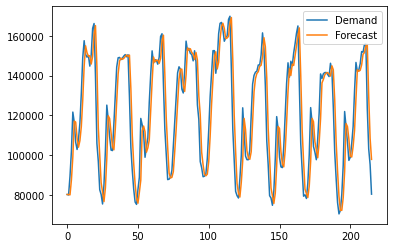

In [349]:
d1_ses_1={'Demand':demand,'Forecast':forecast_d1_ses_1}
d1_ses_2={'Demand':demand,'Forecast':forecast_d1_ses_2}
d1_ses_3={'Demand':demand,'Forecast':forecast_d1_ses_3}

df1=pd.DataFrame(d1_ses_1)
df2=pd.DataFrame(d1_ses_2)
df3=pd.DataFrame(d1_ses_3)

if mse_d1_ses_1<=mse_d1_ses_2 and mse_d1_ses_1<=mse_d1_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d1_ses_2<=mse_d1_ses_1 and mse_d1_ses_2<=mse_d1_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

2. For interval of 2 hour

In [350]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,2)

In [351]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d1_ses_1=ses(demand,alpha1)
forecast_d1_ses_2=ses(demand,alpha2)
forecast_d1_ses_3=ses(demand,alpha3)

In [352]:
#Calculating Mean of Square Errors
mse_d1_ses_1=mean_squared_error(demand,forecast_d1_ses_1)
mse_d1_ses_2=mean_squared_error(demand,forecast_d1_ses_2)
mse_d1_ses_3=mean_squared_error(demand,forecast_d1_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d1_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d1_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d1_ses_3)

Mean of Square Errors for alpha = 0.2 is:  773157956.94384
Mean of Square Errors for alpha = 0.5 is:  611205854.1901741
Mean of Square Errors for alpha = 0.8 is:  481854931.3724031


alpha:  0.8


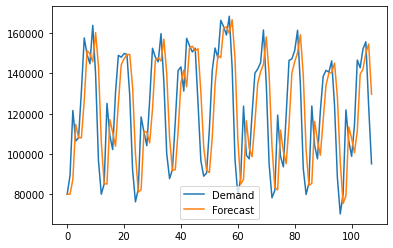

In [353]:
d1_ses_1={'Demand':demand,'Forecast':forecast_d1_ses_1}
d1_ses_2={'Demand':demand,'Forecast':forecast_d1_ses_2}
d1_ses_3={'Demand':demand,'Forecast':forecast_d1_ses_3}

df1=pd.DataFrame(d1_ses_1)
df2=pd.DataFrame(d1_ses_2)
df3=pd.DataFrame(d1_ses_3)

if mse_d1_ses_1<=mse_d1_ses_2 and mse_d1_ses_1<=mse_d1_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d1_ses_2<=mse_d1_ses_1 and mse_d1_ses_2<=mse_d1_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

3. For interval of 4 hour

In [354]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,4)

In [355]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d1_ses_1=ses(demand,alpha1)
forecast_d1_ses_2=ses(demand,alpha2)
forecast_d1_ses_3=ses(demand,alpha3)

In [356]:
#Calculating Mean of Square Errors
mse_d1_ses_1=mean_squared_error(demand,forecast_d1_ses_1)
mse_d1_ses_2=mean_squared_error(demand,forecast_d1_ses_2)
mse_d1_ses_3=mean_squared_error(demand,forecast_d1_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d1_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d1_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d1_ses_3)

Mean of Square Errors for alpha = 0.2 is:  863163813.9531637
Mean of Square Errors for alpha = 0.5 is:  948292620.580777
Mean of Square Errors for alpha = 0.8 is:  1048988981.8626859


alpha:  0.2


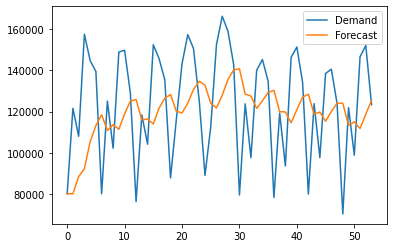

In [357]:
d1_ses_1={'Demand':demand,'Forecast':forecast_d1_ses_1}
d1_ses_2={'Demand':demand,'Forecast':forecast_d1_ses_2}
d1_ses_3={'Demand':demand,'Forecast':forecast_d1_ses_3}

df1=pd.DataFrame(d1_ses_1)
df2=pd.DataFrame(d1_ses_2)
df3=pd.DataFrame(d1_ses_3)

if mse_d1_ses_1<=mse_d1_ses_2 and mse_d1_ses_1<=mse_d1_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d1_ses_2<=mse_d1_ses_1 and mse_d1_ses_2<=mse_d1_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

4. For interval of 8 hour

In [358]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,8)

In [359]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d1_ses_1=ses(demand,alpha1)
forecast_d1_ses_2=ses(demand,alpha2)
forecast_d1_ses_3=ses(demand,alpha3)

In [360]:
#Calculating Mean of Square Errors
mse_d1_ses_1=mean_squared_error(demand,forecast_d1_ses_1)
mse_d1_ses_2=mean_squared_error(demand,forecast_d1_ses_2)
mse_d1_ses_3=mean_squared_error(demand,forecast_d1_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d1_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d1_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d1_ses_3)

Mean of Square Errors for alpha = 0.2 is:  1200799418.4232206
Mean of Square Errors for alpha = 0.5 is:  1486785394.5531507
Mean of Square Errors for alpha = 0.8 is:  1975785973.3474271


alpha:  0.2


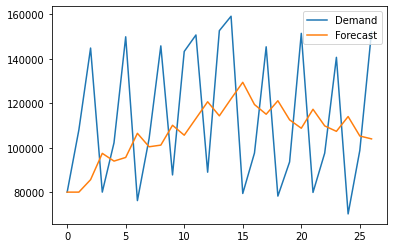

In [361]:
d1_ses_1={'Demand':demand,'Forecast':forecast_d1_ses_1}
d1_ses_2={'Demand':demand,'Forecast':forecast_d1_ses_2}
d1_ses_3={'Demand':demand,'Forecast':forecast_d1_ses_3}

df1=pd.DataFrame(d1_ses_1)
df2=pd.DataFrame(d1_ses_2)
df3=pd.DataFrame(d1_ses_3)

if mse_d1_ses_1<=mse_d1_ses_2 and mse_d1_ses_1<=mse_d1_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d1_ses_2<=mse_d1_ses_1 and mse_d1_ses_2<=mse_d1_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

5. For interval of 12 hour

In [362]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,12)

In [363]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d1_ses_1=ses(demand,alpha1)
forecast_d1_ses_2=ses(demand,alpha2)
forecast_d1_ses_3=ses(demand,alpha3)

In [364]:
#Calculating Mean of Square Errors
mse_d1_ses_1=mean_squared_error(demand,forecast_d1_ses_1)
mse_d1_ses_2=mean_squared_error(demand,forecast_d1_ses_2)
mse_d1_ses_3=mean_squared_error(demand,forecast_d1_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d1_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d1_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d1_ses_3)

Mean of Square Errors for alpha = 0.2 is:  1747936123.9024408
Mean of Square Errors for alpha = 0.5 is:  2275452279.5943346
Mean of Square Errors for alpha = 0.8 is:  3395495803.6505337


alpha:  0.2


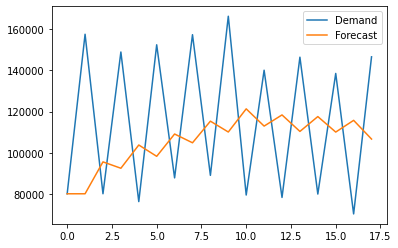

In [365]:
d1_ses_1={'Demand':demand,'Forecast':forecast_d1_ses_1}
d1_ses_2={'Demand':demand,'Forecast':forecast_d1_ses_2}
d1_ses_3={'Demand':demand,'Forecast':forecast_d1_ses_3}

df1=pd.DataFrame(d1_ses_1)
df2=pd.DataFrame(d1_ses_2)
df3=pd.DataFrame(d1_ses_3)

if mse_d1_ses_1<=mse_d1_ses_2 and mse_d1_ses_1<=mse_d1_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d1_ses_2<=mse_d1_ses_1 and mse_d1_ses_2<=mse_d1_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

6. For interval of 24 hour

In [366]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,24)

In [367]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d1_ses_1=ses(demand,alpha1)
forecast_d1_ses_2=ses(demand,alpha2)
forecast_d1_ses_3=ses(demand,alpha3)

In [368]:
#Calculating Mean of Square Errors
mse_d1_ses_1=mean_squared_error(demand,forecast_d1_ses_1)
mse_d1_ses_2=mean_squared_error(demand,forecast_d1_ses_2)
mse_d1_ses_3=mean_squared_error(demand,forecast_d1_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d1_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d1_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d1_ses_3)

Mean of Square Errors for alpha = 0.2 is:  32217825.294944987
Mean of Square Errors for alpha = 0.5 is:  33864845.581732854
Mean of Square Errors for alpha = 0.8 is:  35469025.0734684


alpha:  0.2


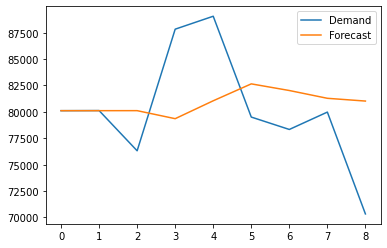

In [369]:
d1_ses_1={'Demand':demand,'Forecast':forecast_d1_ses_1}
d1_ses_2={'Demand':demand,'Forecast':forecast_d1_ses_2}
d1_ses_3={'Demand':demand,'Forecast':forecast_d1_ses_3}

df1=pd.DataFrame(d1_ses_1)
df2=pd.DataFrame(d1_ses_2)
df3=pd.DataFrame(d1_ses_3)

if mse_d1_ses_1<=mse_d1_ses_2 and mse_d1_ses_1<=mse_d1_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d1_ses_2<=mse_d1_ses_1 and mse_d1_ses_2<=mse_d1_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

7. For interval of 48 hour

In [370]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,48)

In [371]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d1_ses_1=ses(demand,alpha1)
forecast_d1_ses_2=ses(demand,alpha2)
forecast_d1_ses_3=ses(demand,alpha3)

In [372]:
#Calculating Mean of Square Errors
mse_d1_ses_1=mean_squared_error(demand,forecast_d1_ses_1)
mse_d1_ses_2=mean_squared_error(demand,forecast_d1_ses_2)
mse_d1_ses_3=mean_squared_error(demand,forecast_d1_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d1_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d1_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d1_ses_3)

Mean of Square Errors for alpha = 0.2 is:  44981311.88800001
Mean of Square Errors for alpha = 0.5 is:  54723931.5625
Mean of Square Errors for alpha = 0.8 is:  64171926.471999966


alpha:  0.2


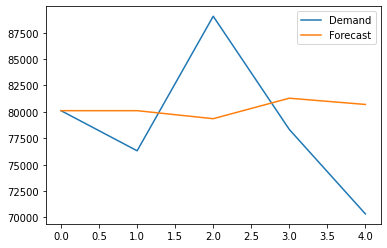

In [373]:
d1_ses_1={'Demand':demand,'Forecast':forecast_d1_ses_1}
d1_ses_2={'Demand':demand,'Forecast':forecast_d1_ses_2}
d1_ses_3={'Demand':demand,'Forecast':forecast_d1_ses_3}

df1=pd.DataFrame(d1_ses_1)
df2=pd.DataFrame(d1_ses_2)
df3=pd.DataFrame(d1_ses_3)

if mse_d1_ses_1<=mse_d1_ses_2 and mse_d1_ses_1<=mse_d1_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d1_ses_2<=mse_d1_ses_1 and mse_d1_ses_2<=mse_d1_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])



---



Tabulating Intervals and least MSE

In [374]:
from tabulate import tabulate
print(tabulate([['1 hour', 7259649.296761258], ['2 hour', 19454329.93952132],['4 hour', 42751249.072139636],['8 hour', 82071109.6621239],['12 hour', 143809234.0369638],['24 hour', 1596106.1283060787],['48 hour', 3208596.3235999886]], headers=['Intervals', 'Least MSE'], tablefmt='grid'))

+-------------+-------------+
| Intervals   |   Least MSE |
+=============+=============+
| 1 hour      | 7.25965e+06 |
+-------------+-------------+
| 2 hour      | 1.94543e+07 |
+-------------+-------------+
| 4 hour      | 4.27512e+07 |
+-------------+-------------+
| 8 hour      | 8.20711e+07 |
+-------------+-------------+
| 12 hour     | 1.43809e+08 |
+-------------+-------------+
| 24 hour     | 1.59611e+06 |
+-------------+-------------+
| 48 hour     | 3.2086e+06  |
+-------------+-------------+


Plotting MSE for Constructed Table

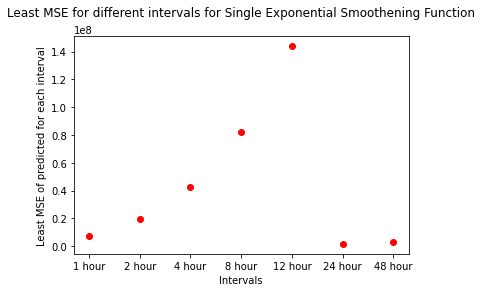

In [434]:
import matplotlib.pyplot as plt
plt.scatter(['1 hour','2 hour','4 hour','8 hour','12 hour','24 hour','48 hour'], [7259649.296761258,1.94543e+07,4.27512e+07,8.20711e+07,1.43809e+08,1.59611e+06,3.2086e+06],c='r')
plt.title('Least MSE for different intervals for Single Exponential Smoothening Function',pad=20)
plt.xlabel('Intervals')
plt.ylabel('Least MSE of predicted for each interval')
plt.show()



---






For Double Exponential Smoothening


1. For interval of 1 hour

In [376]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,1)

In [377]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d1_des_1=des(demand,alpha1,beta1)
forecast_d1_des_2=des(demand,alpha2,beta2)
forecast_d1_des_3=des(demand,alpha3,beta3)

In [378]:
#Calculating Mean of Square Errors
mse_d1_des_1=mean_squared_error(demand,forecast_d1_des_1)
mse_d1_des_2=mean_squared_error(demand,forecast_d1_des_2)
mse_d1_des_3=mean_squared_error(demand,forecast_d1_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d1_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d1_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d1_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  1101400664.8511913
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  326927800.9790601
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  151817769.98831183


alpha:  0.8
beta:  0.9


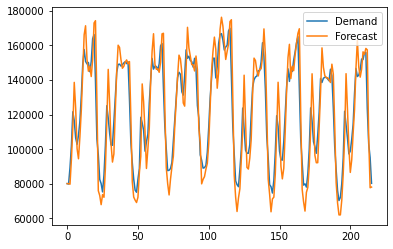

In [379]:
d1_des_1={'Demand':demand,'Forecast':forecast_d1_des_1}
d1_des_2={'Demand':demand,'Forecast':forecast_d1_des_2}
d1_des_3={'Demand':demand,'Forecast':forecast_d1_des_3}

df1=pd.DataFrame(d1_des_1)
df2=pd.DataFrame(d1_des_2)
df3=pd.DataFrame(d1_des_3)

if mse_d1_des_1<=mse_d1_des_2 and mse_d1_des_1<=mse_d1_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d1_des_2<=mse_d1_des_1 and mse_d1_des_2<=mse_d1_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

2. For interval of 2 hour

In [380]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,2)

In [381]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d1_des_1=des(demand,alpha1,beta1)
forecast_d1_des_2=des(demand,alpha2,beta2)
forecast_d1_des_3=des(demand,alpha3,beta3)

In [382]:
#Calculating Mean of Square Errors
mse_d1_des_1=mean_squared_error(demand,forecast_d1_des_1)
mse_d1_des_2=mean_squared_error(demand,forecast_d1_des_2)
mse_d1_des_3=mean_squared_error(demand,forecast_d1_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d1_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d1_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d1_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  1109515968.0266743
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  890854249.6115552
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  671030611.8654052


alpha:  0.8
beta:  0.9


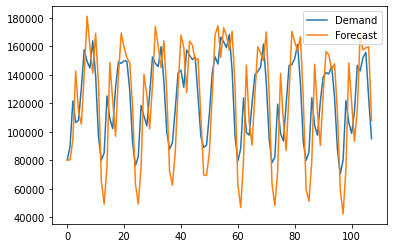

In [383]:
d1_des_1={'Demand':demand,'Forecast':forecast_d1_des_1}
d1_des_2={'Demand':demand,'Forecast':forecast_d1_des_2}
d1_des_3={'Demand':demand,'Forecast':forecast_d1_des_3}

df1=pd.DataFrame(d1_des_1)
df2=pd.DataFrame(d1_des_2)
df3=pd.DataFrame(d1_des_3)

if mse_d1_des_1<=mse_d1_des_2 and mse_d1_des_1<=mse_d1_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d1_des_2<=mse_d1_des_1 and mse_d1_des_2<=mse_d1_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

3. For interval of 4 hour

In [384]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,4)

In [385]:
4#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d1_des_1=des(demand,alpha1,beta1)
forecast_d1_des_2=des(demand,alpha2,beta2)
forecast_d1_des_3=des(demand,alpha3,beta3)

In [386]:
#Calculating Mean of Square Errors
mse_d1_des_1=mean_squared_error(demand,forecast_d1_des_1)
mse_d1_des_2=mean_squared_error(demand,forecast_d1_des_2)
mse_d1_des_3=mean_squared_error(demand,forecast_d1_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d1_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d1_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d1_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  968445044.2949636
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  1529230426.2328463
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  1963870870.2330446


alpha:  0.2
beta:  0.3


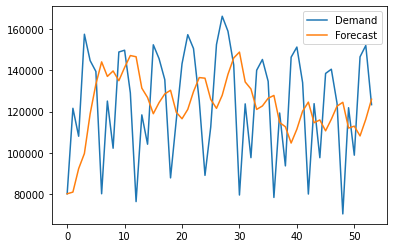

In [387]:
d1_des_1={'Demand':demand,'Forecast':forecast_d1_des_1}
d1_des_2={'Demand':demand,'Forecast':forecast_d1_des_2}
d1_des_3={'Demand':demand,'Forecast':forecast_d1_des_3}

df1=pd.DataFrame(d1_des_1)
df2=pd.DataFrame(d1_des_2)
df3=pd.DataFrame(d1_des_3)

if mse_d1_des_1<=mse_d1_des_2 and mse_d1_des_1<=mse_d1_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d1_des_2<=mse_d1_des_1 and mse_d1_des_2<=mse_d1_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

4. For interval of 8 hour

In [388]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,8)

In [389]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d1_des_1=des(demand,alpha1,beta1)
forecast_d1_des_2=des(demand,alpha2,beta2)
forecast_d1_des_3=des(demand,alpha3,beta3)

In [390]:
#Calculating Mean of Square Errors
mse_d1_des_1=mean_squared_error(demand,forecast_d1_des_1)
mse_d1_des_2=mean_squared_error(demand,forecast_d1_des_2)
mse_d1_des_3=mean_squared_error(demand,forecast_d1_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d1_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d1_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d1_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  1267357938.0254498
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  1958710807.7166195
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  4258271499.505058


alpha:  0.2
beta:  0.3


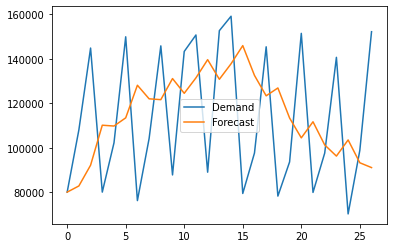

In [391]:
d1_des_1={'Demand':demand,'Forecast':forecast_d1_des_1}
d1_des_2={'Demand':demand,'Forecast':forecast_d1_des_2}
d1_des_3={'Demand':demand,'Forecast':forecast_d1_des_3}

df1=pd.DataFrame(d1_des_1)
df2=pd.DataFrame(d1_des_2)
df3=pd.DataFrame(d1_des_3)

if mse_d1_des_1<=mse_d1_des_2 and mse_d1_des_1<=mse_d1_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d1_des_2<=mse_d1_des_1 and mse_d1_des_2<=mse_d1_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

5. For interval of 12 hour

In [392]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,12)

In [393]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d1_des_1=des(demand,alpha1,beta1)
forecast_d1_des_2=des(demand,alpha2,beta2)
forecast_d1_des_3=des(demand,alpha3,beta3)

In [394]:
#Calculating Mean of Square Errors
mse_d1_des_1=mean_squared_error(demand,forecast_d1_des_1)
mse_d1_des_2=mean_squared_error(demand,forecast_d1_des_2)
mse_d1_des_3=mean_squared_error(demand,forecast_d1_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d1_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d1_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d1_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  1866022155.3642073
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  2821290785.5513735
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  6816780608.205896


alpha:  0.2
beta:  0.3


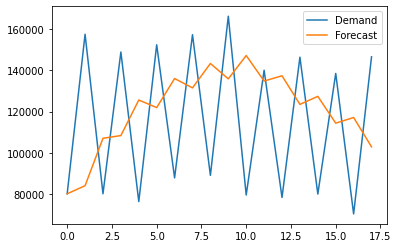

In [395]:
d1_des_1={'Demand':demand,'Forecast':forecast_d1_des_1}
d1_des_2={'Demand':demand,'Forecast':forecast_d1_des_2}
d1_des_3={'Demand':demand,'Forecast':forecast_d1_des_3}

df1=pd.DataFrame(d1_des_1)
df2=pd.DataFrame(d1_des_2)
df3=pd.DataFrame(d1_des_3)

if mse_d1_des_1<=mse_d1_des_2 and mse_d1_des_1<=mse_d1_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d1_des_2<=mse_d1_des_1 and mse_d1_des_2<=mse_d1_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

6. For interval of 24 hour

In [396]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,24)

In [397]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d1_des_1=des(demand,alpha1,beta1)
forecast_d1_des_2=des(demand,alpha2,beta2)
forecast_d1_des_3=des(demand,alpha3,beta3)

In [398]:
#Calculating Mean of Square Errors
mse_d1_des_1=mean_squared_error(demand,forecast_d1_des_1)
mse_d1_des_2=mean_squared_error(demand,forecast_d1_des_2)
mse_d1_des_3=mean_squared_error(demand,forecast_d1_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d1_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d1_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d1_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  38673136.432866834
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  44172240.4409911
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  61017141.37795908


alpha:  0.2
beta:  0.3


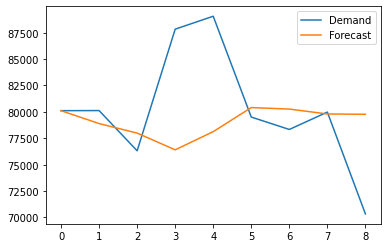

In [399]:
d1_des_1={'Demand':demand,'Forecast':forecast_d1_des_1}
d1_des_2={'Demand':demand,'Forecast':forecast_d1_des_2}
d1_des_3={'Demand':demand,'Forecast':forecast_d1_des_3}

df1=pd.DataFrame(d1_des_1)
df2=pd.DataFrame(d1_des_2)
df3=pd.DataFrame(d1_des_3)

if mse_d1_des_1<=mse_d1_des_2 and mse_d1_des_1<=mse_d1_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot()
elif mse_d1_des_2<=mse_d1_des_1 and mse_d1_des_2<=mse_d1_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

7. For interval of 48 hour

In [400]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,48)

In [401]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d1_des_1=des(demand,alpha1,beta1)
forecast_d1_des_2=des(demand,alpha2,beta2)
forecast_d1_des_3=des(demand,alpha3,beta3)

In [402]:
#Calculating Mean of Square Errors
mse_d1_des_1=mean_squared_error(demand,forecast_d1_des_1)
mse_d1_des_2=mean_squared_error(demand,forecast_d1_des_2)
mse_d1_des_3=mean_squared_error(demand,forecast_d1_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d1_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d1_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d1_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  45955456.35352694
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  72145424.93392006
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  111945799.50883678


alpha:  0.2
beta:  0.3


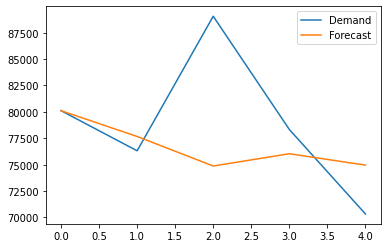

In [403]:
d1_des_1={'Demand':demand,'Forecast':forecast_d1_des_1}
d1_des_2={'Demand':demand,'Forecast':forecast_d1_des_2}
d1_des_3={'Demand':demand,'Forecast':forecast_d1_des_3}

df1=pd.DataFrame(d1_des_1)
df2=pd.DataFrame(d1_des_2)
df3=pd.DataFrame(d1_des_3)

if mse_d1_des_1<=mse_d1_des_2 and mse_d1_des_1<=mse_d1_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d1_des_2<=mse_d1_des_1 and mse_d1_des_2<=mse_d1_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])



---



Tabulating Intervals and least MSE

In [404]:
from tabulate import tabulate
print(tabulate([['1 hour', 152523899.15104818], ['2 hour', 677354852.243056],['4 hour', 986657521.3936207],['8 hour', 1328342573.8828502],['12 hour', 1947026372.9670796],['24 hour', 42100064.65345317],['48 hour', 59362817.40053587]], headers=['Intervals', 'Least MSE'], tablefmt='grid'))

+-------------+-------------+
| Intervals   |   Least MSE |
+=============+=============+
| 1 hour      | 1.52524e+08 |
+-------------+-------------+
| 2 hour      | 6.77355e+08 |
+-------------+-------------+
| 4 hour      | 9.86658e+08 |
+-------------+-------------+
| 8 hour      | 1.32834e+09 |
+-------------+-------------+
| 12 hour     | 1.94703e+09 |
+-------------+-------------+
| 24 hour     | 4.21001e+07 |
+-------------+-------------+
| 48 hour     | 5.93628e+07 |
+-------------+-------------+


Plotting MSE for Constructed Table

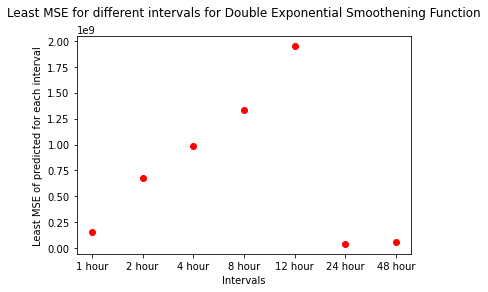

In [433]:
import matplotlib.pyplot as plt
plt.scatter(['1 hour','2 hour','4 hour','8 hour','12 hour','24 hour','48 hour'], [1.52524e+08,6.77355e+08,9.86658e+08,1.32834e+09, 1.94703e+09,4.21001e+07,5.93628e+07],c='r')
plt.title('Least MSE for different intervals for Double Exponential Smoothening Function',pad=20)
plt.xlabel('Intervals')
plt.ylabel('Least MSE of predicted for each interval')
plt.show()



---



For Triple Exponential Smoothening

1. For interval of 1 hour

In [406]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,1)

In [407]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

gamma1=0.4
gamma2=0.7
gamma3=0.95

#Considering season of 24 hours here

forecast_d1_tes_1=tes(demand,24,alpha1,beta1,gamma1,0)
forecast_d1_tes_2=tes(demand,24,alpha2,beta2,gamma2,0)
forecast_d1_tes_3=tes(demand,24,alpha3,beta3,gamma3,0)

In [408]:
mse_d1_tes_1=mean_squared_error(demand,forecast_d1_tes_1)
mse_d1_tes_2=mean_squared_error(demand,forecast_d1_tes_2)
mse_d1_tes_3=mean_squared_error(demand,forecast_d1_tes_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is: ",mse_d1_tes_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is: ",mse_d1_tes_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is: ",mse_d1_tes_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is:  39484131.11945676
Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is:  23937405.76224272
Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is:  29542236.11162395


alpha:  0.5
beta:  0.6
gamma:  0.7


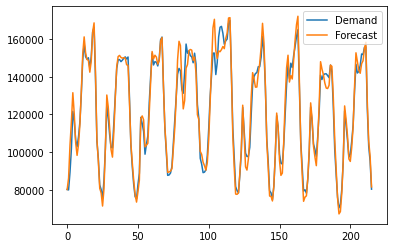

In [409]:
d1_tes_1={'Demand':demand,'Forecast':forecast_d1_tes_1}
d1_tes_2={'Demand':demand,'Forecast':forecast_d1_tes_2}
d1_tes_3={'Demand':demand,'Forecast':forecast_d1_tes_3}

df1=pd.DataFrame(d1_tes_1)
df2=pd.DataFrame(d1_tes_2)
df3=pd.DataFrame(d1_tes_3)

if mse_d1_tes_1<=mse_d1_tes_2 and mse_d1_tes_1<=mse_d1_tes_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  print('gamma: ',gamma1)
  df1.plot(style=['-','-'])
elif mse_d1_tes_2<=mse_d1_tes_1 and mse_d1_tes_2<=mse_d1_tes_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  print('gamma: ',gamma2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  print('gamma: ',gamma3)
  df3.plot(style=['-','-'])

2. For interval of 2 hour

In [410]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,2)

In [411]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

gamma1=0.4
gamma2=0.7
gamma3=0.95

#Considering season of 24 hours here

forecast_d1_tes_1=tes(demand,24,alpha1,beta1,gamma1,0)
forecast_d1_tes_2=tes(demand,24,alpha2,beta2,gamma2,0)
forecast_d1_tes_3=tes(demand,24,alpha3,beta3,gamma3,0)

In [412]:
mse_d1_tes_1=mean_squared_error(demand,forecast_d1_tes_1)
mse_d1_tes_2=mean_squared_error(demand,forecast_d1_tes_2)
mse_d1_tes_3=mean_squared_error(demand,forecast_d1_tes_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is: ",mse_d1_tes_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is: ",mse_d1_tes_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is: ",mse_d1_tes_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is:  40009817.474158354
Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is:  17164836.018496428
Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is:  58165297.37222875


alpha:  0.5
beta:  0.6
gamma:  0.7


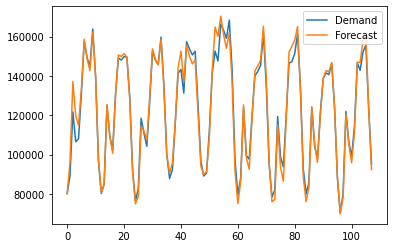

In [413]:
d1_tes_1={'Demand':demand,'Forecast':forecast_d1_tes_1}
d1_tes_2={'Demand':demand,'Forecast':forecast_d1_tes_2}
d1_tes_3={'Demand':demand,'Forecast':forecast_d1_tes_3}

df1=pd.DataFrame(d1_tes_1)
df2=pd.DataFrame(d1_tes_2)
df3=pd.DataFrame(d1_tes_3)

if mse_d1_tes_1<=mse_d1_tes_2 and mse_d1_tes_1<=mse_d1_tes_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  print('gamma: ',gamma1)
  df1.plot(style=['-','-'])
elif mse_d1_tes_2<=mse_d1_tes_1 and mse_d1_tes_2<=mse_d1_tes_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  print('gamma: ',gamma2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  print('gamma: ',gamma3)
  df3.plot(style=['-','-'])

3. For interval of 4 hour

In [414]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,4)

In [415]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

gamma1=0.4
gamma2=0.7
gamma3=0.95

#Considering season of 24 hours here

forecast_d1_tes_1=tes(demand,24,alpha1,beta1,gamma1,0)
forecast_d1_tes_2=tes(demand,24,alpha2,beta2,gamma2,0)
forecast_d1_tes_3=tes(demand,24,alpha3,beta3,gamma3,0)

In [416]:
mse_d1_tes_1=mean_squared_error(demand,forecast_d1_tes_1)
mse_d1_tes_2=mean_squared_error(demand,forecast_d1_tes_2)
mse_d1_tes_3=mean_squared_error(demand,forecast_d1_tes_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is: ",mse_d1_tes_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is: ",mse_d1_tes_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is: ",mse_d1_tes_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is:  40430059.05957822
Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is:  13504506.565167785
Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is:  74924697.4207713


alpha:  0.5
beta:  0.6
gamma:  0.7


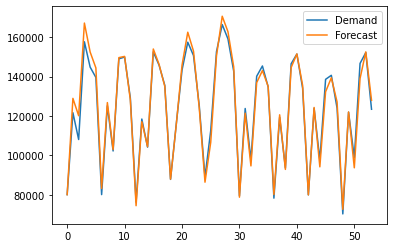

In [417]:
d1_tes_1={'Demand':demand,'Forecast':forecast_d1_tes_1}
d1_tes_2={'Demand':demand,'Forecast':forecast_d1_tes_2}
d1_tes_3={'Demand':demand,'Forecast':forecast_d1_tes_3}

df1=pd.DataFrame(d1_tes_1)
df2=pd.DataFrame(d1_tes_2)
df3=pd.DataFrame(d1_tes_3)

if mse_d1_tes_1<=mse_d1_tes_2 and mse_d1_tes_1<=mse_d1_tes_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  print('gamma: ',gamma1)
  df1.plot(style=['-','-'])
elif mse_d1_tes_2<=mse_d1_tes_1 and mse_d1_tes_2<=mse_d1_tes_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  print('gamma: ',gamma2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  print('gamma: ',gamma3)
  df3.plot(style=['-','-'])

For the intervals 8 hours, 12 hours, 24 hours and 48 hours, the triple exponential smoothening defined by me is not giving output since I have taken the season length to be 24 hours. Thus while applying the triple exponential smoothening, the index is going out of bound.


---



Tabulating Intervals and least MSE

In [435]:
from tabulate import tabulate
print(tabulate([['1 hour', 23937405.76224272], ['2 hour', 17164836.018496428],['4 hour', 13504506.565167785]], headers=['Intervals', 'Least MSE'], tablefmt='grid'))

+-------------+-------------+
| Intervals   |   Least MSE |
+=============+=============+
| 1 hour      | 2.39374e+07 |
+-------------+-------------+
| 2 hour      | 1.71648e+07 |
+-------------+-------------+
| 4 hour      | 1.35045e+07 |
+-------------+-------------+


Plotting MSE for Constructed Table

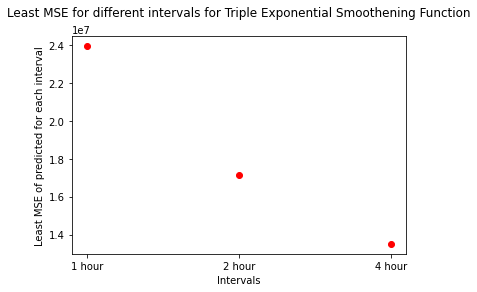

In [436]:
import matplotlib.pyplot as plt
plt.scatter(['1 hour','2 hour','4 hour'], [2.39374e+07,1.71648e+07,1.35045e+07],c='r')
plt.title('Least MSE for different intervals for Triple Exponential Smoothening Function',pad=20)
plt.xlabel('Intervals')
plt.ylabel('Least MSE of predicted for each interval')
plt.show()



---

---

---







**Forecasting with inbuilt function**

In [418]:
data_for_inbuilt=pd.read_csv('D1.csv')

Forecast for Single Exponential Smoothening

In [419]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

data_for_inbuilt['SES']=SimpleExpSmoothing(data_for_inbuilt['Ads']).fit(smoothing_level=0.8,optimized=False).fittedvalues.shift(0)
data_for_inbuilt

,Time,Ads,SES
0,13-09-2017 00:00,80115,80115.000000
1,13-09-2017 01:00,79885,80115.000000
2,13-09-2017 02:00,89325,79931.000000
3,13-09-2017 03:00,101930,87446.200000
4,13-09-2017 04:00,121630,99033.240000
...,...,...,...
211,21-09-2017 19:00,155890,154849.072140
212,21-09-2017 20:00,123395,155681.814428
213,21-09-2017 21:00,103080,129852.362886
214,21-09-2017 22:00,95155,108434.472577


Comparing between my implementation and inbuilt function output

In [420]:
#Creating demand list in 'n' intervals
demand=dem_n(data.Ads,1)

In [421]:
#Forecasting
alpha=0.8
forecast_d1_ses=ses(demand,alpha)

In [422]:
my_mse=mean_squared_error(demand,forecast_d1_ses)
inbuilt_mse=mean_squared_error(data_for_inbuilt.Ads,data_for_inbuilt.SES)

In [423]:
#Calculating error between my implementation and inbuilt function
error=(inbuilt_mse-my_mse)/inbuilt_mse*100
print("Precentage error between my implementation and inbuilt function output is: ",error,"%")

Precentage error between my implementation and inbuilt function output is:  0.0 %


Forecast for Double Exponential Smoothening

In [424]:
from statsmodels.tsa.holtwinters import Holt

data_for_inbuilt['DES'] = Holt(data_for_inbuilt['Ads']).fit(smoothing_level=0.2, smoothing_slope=0.3).fittedvalues.shift(0)

data_for_inbuilt

,Time,Ads,SES,DES
0,13-09-2017 00:00,80115,80115.000000,80115.000000
1,13-09-2017 01:00,79885,80115.000000,80115.000000
2,13-09-2017 02:00,89325,79931.000000,80055.200000
3,13-09-2017 03:00,101930,87446.200000,82451.548000
4,13-09-2017 04:00,121630,99033.240000,88058.333520
...,...,...,...,...
211,21-09-2017 19:00,155890,154849.072140,172680.423326
212,21-09-2017 20:00,123395,155681.814428,175171.840805
213,21-09-2017 21:00,103080,129852.362886,167559.364339
214,21-09-2017 22:00,95155,108434.472577,153537.621307


Comparing between my implementation and inbuilt function output

In [425]:
#Forecasting
alpha=0.2
beta=0.3
forecast_d1_des=des(demand,alpha,beta)

In [426]:
my_mse=mean_squared_error(demand,forecast_d1_des)
inbuilt_mse=mean_squared_error(data_for_inbuilt.Ads,data_for_inbuilt.DES)

In [427]:
#Calculating error between my implementation and inbuilt function
error=(inbuilt_mse-my_mse)/inbuilt_mse*100
print("Precentage error between my implementation and inbuilt function output is: ",error,"%")

Precentage error between my implementation and inbuilt function output is:  0.00023205415654692105 %


Forecast for Triple Exponential Smoothening

In [428]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data_for_inbuilt['TES'] = ExponentialSmoothing(data_for_inbuilt['Ads']).fit(smoothing_level=0.5, smoothing_slope=0.6,smoothing_seasonal=0.7).fittedvalues.shift(0)
data_for_inbuilt


,Time,Ads,SES,DES,TES
0,13-09-2017 00:00,80115,80115.000000,80115.000000,84783.300000
1,13-09-2017 01:00,79885,80115.000000,80115.000000,82449.150000
2,13-09-2017 02:00,89325,79931.000000,80055.200000,81167.075000
3,13-09-2017 03:00,101930,87446.200000,82451.548000,85246.037500
4,13-09-2017 04:00,121630,99033.240000,88058.333520,93588.018750
...,...,...,...,...,...
211,21-09-2017 19:00,155890,154849.072140,172680.423326,152690.268368
212,21-09-2017 20:00,123395,155681.814428,175171.840805,154290.134184
213,21-09-2017 21:00,103080,129852.362886,167559.364339,138842.567092
214,21-09-2017 22:00,95155,108434.472577,153537.621307,120961.283546


Comparing between my implementation and inbuilt function output

In [429]:
#Forecasting
alpha=0.5
beta=0.6
gamma=0.7
forecast_d1_tes=tes(demand,24,alpha,beta,gamma,0)

In [430]:
my_mse=mean_squared_error(demand,forecast_d1_tes)
inbuilt_mse=mean_squared_error(data_for_inbuilt.Ads,data_for_inbuilt.TES)

In [431]:
#Calculating error between my implementation and inbuilt function
error=(inbuilt_mse-my_mse)/inbuilt_mse*100
print("Precentage error between my implementation and inbuilt function output is: ",error,"%")

Precentage error between my implementation and inbuilt function output is:  91.87249727735984 %
